In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import ARDRegression
from sklearn.metrics import f1_score, confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import openpyxl as xl

In [ ]:
def read_xl(path_to_xl):
    excel = xl.load_workbook('d:/ITMO/Hackathon/Сезон 20-21/X10 2020-2021.xlsx')

def get_dataset(path_to_folder):
    

In [3]:
df = pd.read_csv('d:/ITMO/Hackathon/test_1.csv', sep=';')

In [13]:
pd.set_option('max_columns', None)

In [14]:
df

,t,Rf,VT,VE_ergo,IV,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,VE/VCO2,VO2/Kg,METS,ЧСС,VO2/HR,FeO2,FeCO2,FetO2,FetCO2,FiO2,FiCO2,PeO2,PeCO2,PetO2,PetCO2,SpO2,Power,P Сист.,P. диастол.,Фаза,Маркер,Комн. Темп.,RH Amb,Давление датчик.,PB,EEkc,EEh,EEm,EEtot,EEkg,PRO,FAT,CHO,PRO%,FAT%,CHO%,npRQ,GPS Дист.,ST I,ST II,ST III,ST aVR,ST aVL,ST aVF,ST V1,ST V2,ST V3,ST V4,ST V5,ST V6,S I,S II,S III,S aVR,S aVL,S aVF,S V1,S V2,S V3,S V4,S V5,S V6,Ti,Te,Ttot,Ti/Ttot,VD/VT e,LogVE,t Rel,марк. Скорость,mark Dist.,DP,Время фазы,VO2%Pred,VO2/Kg%Pred,BR,VT/Ti,HRR,PaCO2_e,SV,CO
0,00:01,"26,2","0,994","26,044",877,"882,0747704","700,7039841","0,79","165,1","35,9","27,4","34,6","9,8","2,8",53,"16,6","16,61","3,61","15,19","4,89","20,9","0,05",108,24,99,32,0,0,NaN,NaN,REST,NaN,"23,2",50,623,699,6064,"252,7","4,21",0,"67,4",0,4255,1808,0,"70,2","29,8","0,79",0,"0,8",2,"1,2","-1,4","-0,2","1,6","0,3","2,4","3,6","3,7","2,4","1,6","0,6","0,9","0,3","-0,8","0,2","0,6","-0,7","1,2","2,2","3,1","1,8","0,8","1,32","0,97","2,29","0,58","0,24","1,416",0,0,0,NaN,00:00,27,27,"85,3","0,75",133,34,"209,2","11,1"
1,00:05,"19,87","0,989","19,642",690,"702,8669175","552,3766489","0,79","161,9333333","37,3333333",26,33,"7,81","2,2",54,13,"16,38","3,78","14,75","5,22","20,9","0,05",107,25,96,34,0,0,NaN,NaN,REST,NaN,"23,2",50,623,699,4822,"200,9","3,35",0,"53,6",0,3524,1298,0,"73,1","26,9","0,79",0,"0,8","2,1","1,3","-1,4","-0,2","1,7","0,3","2,4","3,5","3,7","2,4","1,7","0,6","1,4","0,7",-1,0,1,"-0,7","1,2","2,1","2,8","1,8","0,9","1,1","1,92","3,02","0,36","0,25","1,293",4,0,0,NaN,00:04,22,22,"88,9","0,9",132,36,"173,5","9,4"
2,00:07,"18,26","0,902","16,467",684,"597,9324037","460,8443154","0,77","147,3333333","33,9","25,4",33,"6,64","1,9",61,"9,8","16,33","3,76","14,59","5,3","20,91","0,05",106,25,95,35,0,0,NaN,NaN,REST,NaN,"23,2",50,623,699,4088,"170,3","2,84",0,"45,4",0,3199,889,0,"78,2","21,8","0,77",0,"0,8","2,2","1,3","-1,5","-0,2","1,7","0,2","2,4","3,4","3,6","2,3","1,7","0,6","1,8","1,2","-1,2","-0,3","1,5","-0,6","1,1","1,9","2,4","1,8","1,1","1,07","2,22","3,29","0,33","0,25","1,217",2,0,0,NaN,00:06,18,18,"90,7","0,84",125,37,"135,5","8,3"
3,00:11,"19,76","0,84","16,591",836,"618,4127406","460,8870531","0,75","136,4666667","31,3","24,6",33,"6,87",2,67,"9,2","16,25","3,73","14,49","5,31","20,92","0,05",106,24,94,35,0,0,NaN,NaN,REST,NaN,"23,2",50,623,699,4203,"175,1","2,92",0,"46,7",0,3654,549,0,"86,9","13,1","0,75",0,"0,8","2,2","1,4","-1,5","-0,3","1,8","0,2","2,3","3,3","3,5","2,3","1,7","0,6","2,2","1,7","-1,4","-0,6","1,9","-0,5","1,1","1,7",2,"1,8","1,3","1,19","1,85","3,04","0,39","0,25","1,22",4,0,0,NaN,00:10,19,19,"90,7","0,71",119,37,"126,7","8,5"
4,00:14,"18,71","0,881","16,491",863,"648,4131447","473,8426381","0,73",141,"33,9666667","23,4",32,"7,2","2,1",74,"8,8",16,"3,85","14,12","5,5","20,91","0,05",104,25,92,36,0,0,NaN,NaN,REST,NaN,"23,2",50,623,699,4392,183,"3,05",1,"48,8",0,4036,356,0,"91,9","8,1","0,73",0,"0,8","2,2","1,4","-1,5","-0,3","1,8","0,2","2,3","3,2","3,4","2,3","1,7","0,7",2,"1,4","-1,3","-0,4","1,7","-0,3","1,1","1,9",2,"1,7","1,4","1,23","1,98","3,21","0,38","0,26","1,217",3,0,0,NaN,00:13,20,20,"90,7","0,72",112,38,119,"8,8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,13:49,"53,41","3,396","181,371",1839,"4068,648661","4918,567723","1,21","601,7666667","126,5","43,7","36,1","45,21","12,9",168,"24,2","17,72","3,73","16,77","4,94","20,82","0,14",116,24,109,32,0,400,NaN,NaN,EXERCISE,NaN,"23,4",49,623,699,30641,"1276,7","21,28",163,"340,5",0,0,30641,0,0,100,"1,21",0,"0,2","1,4","1,1","-0,8","-0,4","1,2","0,5","1,7","4,1",4,"1,8","-0,4","-3,2","-4,4","-1,2","3,8",-1,"-2,8","-3,5","6,1","15,9","13,2",8,"2,4","0,53","

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 92 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   t                 362 non-null    object 
 1   Rf                362 non-null    object 
 2   VT                362 non-null    object 
 3   VE_ergo           362 non-null    object 
 4   IV                362 non-null    int64  
 5   VO2               362 non-null    object 
 6   VCO2              362 non-null    object 
 7   RQ                362 non-null    object 
 8   O2exp             362 non-null    object 
 9   CO2exp            362 non-null    object 
 10  VE/VO2            362 non-null    object 
 11  VE/VCO2           362 non-null    object 
 12  VO2/Kg            362 non-null    object 
 13  METS              362 non-null    object 
 14  ЧСС               362 non-null    int64  
 15  VO2/HR            362 non-null    object 
 16  FeO2              362 non-null    object 
 1

In [8]:
df.describe()

,IV,ЧСС,PeO2,PeCO2,PetO2,PetCO2,SpO2,Power,P Сист.,P. диастол.,...,PRO%,GPS Дист.,t Rel,марк. Скорость,mark Dist.,DP,VO2%Pred,VO2/Kg%Pred,HRR,PaCO2_e
count,362.000000,362.00000,362.000000,362.000000,362.000000,362.000000,362.0,362.000000,9.000000,9.000000,...,362.0,362.0,362.000000,362.0,362.0,9.000000,362.000000,362.000000,362.00000,362.000000
mean,1806.906077,122.58011,102.323204,31.129834,93.198895,40.549724,0.0,227.483425,170.000000,88.888889,...,0.0,0.0,2.441989,0.0,0.0,21660.000000,80.417127,80.417127,63.41989,42.000000
std,370.973686,29.90753,5.611915,2.895645,6.842850,3.335200,0.0,110.627327,25.980762,3.333333,...,0.0,0.0,2.667794,0.0,0.0,8129.288099,32.304559,32.304559,29.90753,2.992141
min,684.000000,53.00000,94.000000,1.000000,82.000000,2.000000,0.0,0.000000,130.000000,80.000000,...,0.0,0.0,0.000000,0.0,0.0,10790.000000,0.000000,0.000000,18.00000,7.000000
25%,1531.000000,91.00000,98.000000,30.000000,88.000000,39.250000,0.0,121.500000,150.000000,90.000000,...,0.0,0.0,2.000000,0.0,0.0,13500.000000,48.250000,48.250000,37.00000,41.000000
50%,1870.000000,129.00000,101.000000,32.000000,92.000000,41.000000,0.0,232.500000,180.000000,90.000000,...,0.0,0.0,2.000000,0.0,0.0,23220.000000,84.000000,84.000000,57.00000,43.000000
75%,2125.750000,149.00000,105.750000,33.000000,97.750000,42.000000,0.0,326.750000,190.000000,90.000000,...,0.0,0.0,3.000000,0.0,0.0,28080.000000,110.000000,110.000000,95.00000,44.000000
max,2372.000000,168.00000,152.000000,36.000000,133.000000,45.000000,0.0,401.000000,200.000000,90.000000,...,0.0,0.0,51.000000,0.0,0.0,31400.000000,131.000000,131.000000,133.00000,46.000000


In [11]:
sns.set(rc={'figure.figsize':(15,10)})

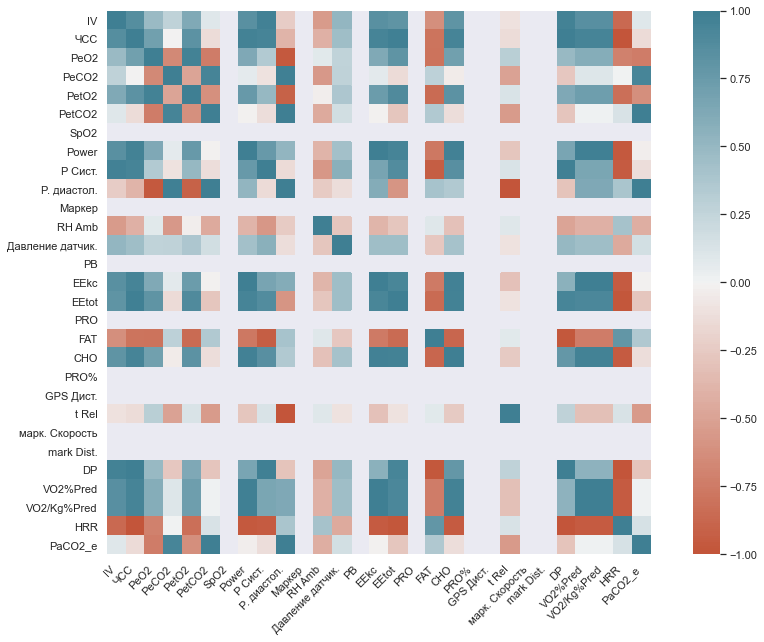

In [12]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

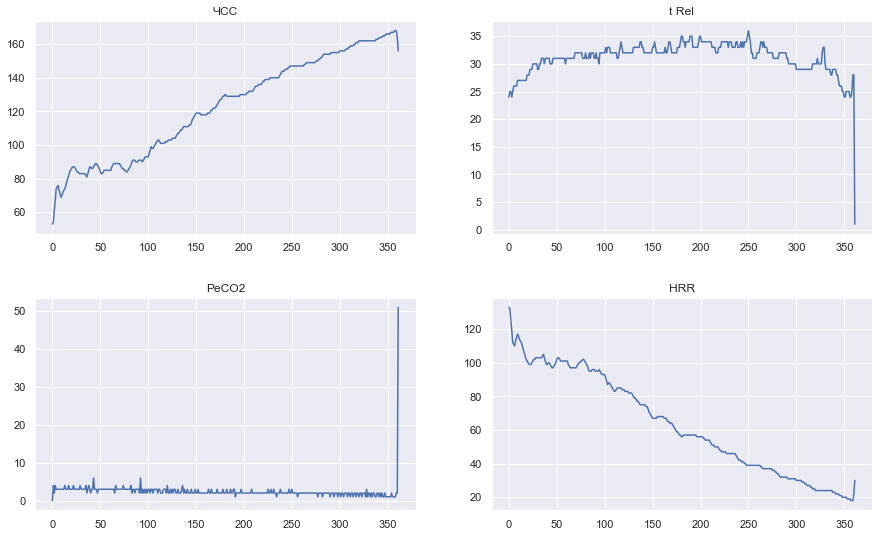

In [18]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 9))

df['ЧСС'].plot(ax=axarr[0][0])
df['t Rel'].plot(ax=axarr[1][0])
df['PeCO2'].plot(ax=axarr[0][1])
df['HRR'].plot(ax=axarr[1][1])
axarr[0][0].set_title("ЧСС")
axarr[0][1].set_title("t Rel")
axarr[1][0].set_title("PeCO2")
axarr[1][1].set_title("HRR")
plt.subplots_adjust(hspace=.3)

In [127]:
df_27 = pd.read_csv('d:/ITMO/Hackathon/data/season_20-21.csv', index_col=0)

In [128]:
df_27.head()

,t,Rf,VT,VE_ergo,IV,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,VE/VCO2,VO2/Kg,METS,ЧСС,VO2/HR,FeO2,FeCO2,FetO2,FetCO2,FiO2,FiCO2,PeO2,PeCO2,PetO2,PetCO2,SpO2,Power,Revolution,P Сист.,P. диастол.,Фаза,player,Маркер,Комн. Темп.
1,00:03:37,17.63,1.689,29.771,1382,1158.269597,946.577339,0.82,266.900000,72.700000,24.6,30.1,11.58,3.3,100.0,11.6,15.81,4.31,14.29,5.73,20.79,0.07,102,28,93,37,0,94.0,68.0,NaN,NaN,EXERCISE,X10 2020-2021 (2),NaN,NaN
2,00:03:41,17.54,1.682,29.515,1455,1166.036168,941.134616,0.81,264.733333,72.633333,24.3,30.1,11.66,3.3,99.0,11.8,15.74,4.32,14.12,5.78,20.79,0.07,102,28,91,37,0,95.0,66.0,NaN,NaN,EXERCISE,X10 2020-2021 (2),NaN,NaN
3,00:03:44,18.27,1.739,31.773,1442,1268.739992,1011.768386,0.80,273.366667,74.966667,24.0,30.1,12.69,3.6,99.0,12.8,15.72,4.31,14.17,5.72,20.82,0.07,102,28,92,37,0,98.0,66.0,NaN,NaN,EXERCISE,X10 2020-2021 (2),NaN,NaN
4,00:03:47,19.57,1.790,35.028,1328,1400.808971,1109.245689,0.79,281.466667,76.833333,24.0,30.3,14.01,4.0,98.0,14.3,15.72,4.29,14.22,5.68,20.82,0.07,102,28,92,37,0,99.0,66.0,NaN,NaN,EXERCISE,X10 2020-2021 (2),NaN,NaN
5,00:03:50,24.23,1.502,36.380,1089,1418.586185,1116.612370,0.79,237.966667,62.700000,24.4,31.1,14.19,4.1,98.0,14.5,15.85,4.18,14.61,5.33,20.81,0.09,103,27,95,35,0,100.0,66.0,NaN,NaN,EXERCISE,X10 2020-2021 (2),NaN,NaN


In [129]:
df_27_mean = df_27.groupby('player').mean()

In [130]:
df_27_mean = df_27_mean.reset_index()

In [131]:
df_results = pd.read_csv('d:/ITMO/Hackathon/data/results_season_20_21_1.csv', sep=';')

In [132]:
df_27_mean['file'] = df_27_mean['player']
df_27_mean['player'] = df_27_mean['file'].apply(lambda x: x.split()[0])
df_27_mean['season_part'] = df_27_mean['file'].apply(lambda x: 2 if x.split()[-1] == '(2)' else 1)
df_27_mean.drop(columns=['file'], inplace=True)

In [133]:
df_27_mean.head()

,player,Rf,VT,VE_ergo,IV,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,VE/VCO2,VO2/Kg,METS,ЧСС,VO2/HR,FeO2,FeCO2,FetO2,FetCO2,FiO2,FiCO2,PeO2,PeCO2,PetO2,PetCO2,SpO2,Power,Revolution,P Сист.,P. диастол.,Маркер,Комн. Темп.,season_part
0,X10,27.530541,3.394996,98.767564,2362.127413,2849.195693,2895.337829,0.989344,572.091478,138.241668,32.124710,32.111969,29.073475,8.306178,149.247104,18.626641,16.717490,4.140927,15.565830,5.372046,20.904479,0.050541,109.154440,27.027027,101.664093,35.123552,0.0,262.046332,NaN,168.000000,82.000000,NaN,NaN,1
1,X10,28.988254,3.410000,103.556198,2208.594675,3242.642375,3143.507831,0.944941,562.150986,143.941617,29.877219,31.397041,32.426302,9.266864,146.088757,21.609172,16.377012,4.263550,15.059852,5.661391,20.804822,0.078787,106.136095,27.633136,97.603550,36.674556,0.0,312.236686,67.408284,177.142857,78.571429,NaN,NaN,2
2,X11,25.865669,2.967024,79.273366,2128.208661,3175.426425,3159.967750,0.967362,454.859843,161.627297,23.544094,24.267323,36.084291,10.310630,125.354331,24.833465,15.263031,5.448465,13.789882,7.003622,20.832874,0.085157,99.062992,35.374016,89.492126,45.448819,0.0,281.716535,66.240157,167.000000,98.000000,NaN,NaN,1
3,X11,27.831791,2.608978,75.447813,1645.361940,2941.922402,2950.019001,0.974403,399.168657,140.066045,23.886567,24.346269,33.814963,9.659701,126.626866,22.747015,15.181306,5.403470,13.747201,6.934776,20.632425,0.131567,99.735075,35.503731,90.324627,45.585821,0.0,272.641791,74.119403,173.333333,80.000000,NaN,NaN,2
4,X12,32.652795,2.505156,84.432069,1548.072046,2705.469726,2760.924341,0.991499,413.802113,113.030163,29.274640,29.398847,32.208012,9.202305,154.997118,17.078963,16.432565,4.516311,15.295504,5.739481,20.916052,0.108415,106.838617,29.334294,99.429395,37.291066,0.0,280.380403,73.821326,182.500000,85.000000,NaN,NaN,1


In [134]:
df_results.head()

,player,position,age,passes,goals,game_time,game_count,pass_goal_time,result
0,X1,Z,19,22,3,22:24,60,54,2
1,X2,Z,19,3,0,17:43,51,354,3
2,X3,Z,19,19,7,19:48,60,46,2
3,X4,Z,20,6,2,14:59,40,112,3
4,X5,Z,20,8,2,20:22,50,122,3


In [135]:
df_27_mean = pd.merge(df_27_mean, df_results[['player', 'age', 'result']], on='player')

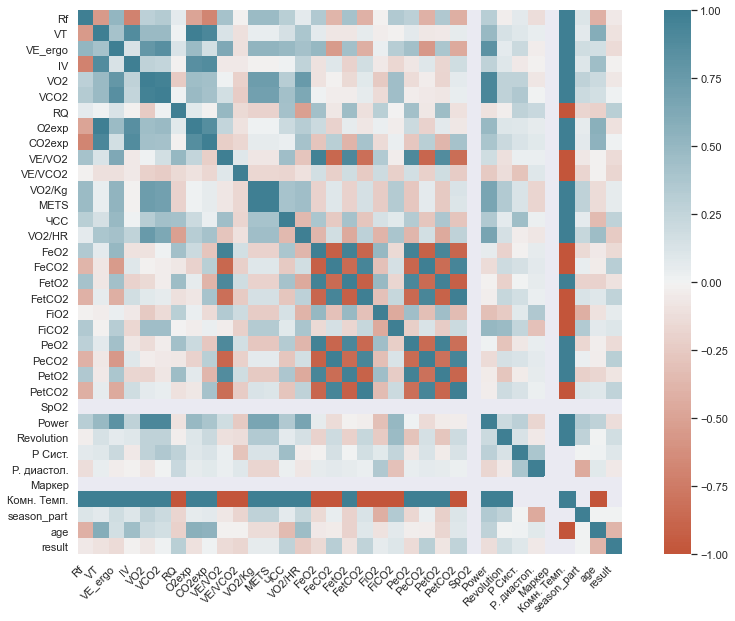

In [136]:
sns.set(rc={'figure.figsize':(15,10)})

corr = df_27_mean.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [137]:
X = df_27_mean[df_27_mean['season_part'] == 1].drop(columns=['result', 'player', 'season_part'])
y = df_27_mean[df_27_mean['season_part'] == 1]['result']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:
cb = CatBoostClassifier(iterations=500)
cb.fit(X, y, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [139]:
cb.get_feature_importance(prettified=True)

,Feature Id,Importances
0,RQ,14.106059
1,P. диастол.,9.482816
2,ЧСС,7.448122
3,PetCO2,5.184278
4,METS,5.135935
5,age,4.658044
6,PeCO2,4.048662
7,FetCO2,3.709605
8,FiCO2,3.030243
9,CO2exp,2.984795


In [63]:
cb.predict(X_test), y_test

(array([[1],
        [1],
        [1],
        [1],
        [3]], dtype=int64),
 12    1
 8     1
 4     1
 26    1
 30    3
 Name: result, dtype: int64)

### ARD Regression
https://habr.com/ru/post/313566/

In [89]:
ard_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    ARDRegression()
)
ard_pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('ardregression', ARDRegression())])

In [90]:
ard_pipe.predict(X_test)

array([1.57021447, 2.40041992, 2.59478574, 1.61245363, 1.87269119])

In [163]:
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
#     StandardScaler(),
    PCA(n_components=2)
)

In [164]:
x_components = pipeline.fit_transform(X)

C:\Users\Asus\anaconda3\envs\nlp_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

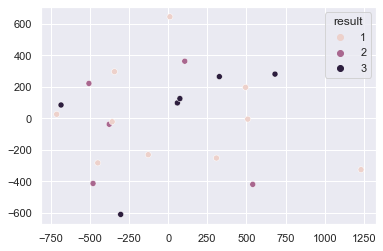

In [165]:
sns.scatterplot(x_components[:, 0], x_components[:, 1], hue=y)

## TEST

In [143]:
df_test = pd.read_csv('d:/ITMO/Hackathon/data/season_21-22.csv', index_col=0)

In [144]:
df_result_test = pd.read_csv('d:/ITMO/Hackathon/data/results_season_21_22_1.csv', sep=';')

In [145]:
df_test_27_mean = df_test.groupby('player').mean()

In [146]:
df_test_27_mean = df_test_27_mean.reset_index()

In [147]:
df_test_27_mean.head()

,player,Rf,VT,VE_ergo,IV,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,VE/VCO2,VO2/Kg,METS,ЧСС,VO2/HR,FeO2,FeCO2,FetO2,FetCO2,FiO2,FiCO2,PeO2,PeCO2,PetO2,PetCO2,SpO2,Power,Revolution,P Сист.,P. диастол.
0,X1 2021-2022,31.527483,2.461160,79.719460,1708.482838,2730.545114,3093.349182,1.091030,407.087313,117.245581,27.434096,25.169336,30.339497,8.669336,129.679634,20.604805,16.448764,4.724279,15.458169,5.962723,20.832769,0.079039,117.933638,33.903890,110.816934,42.768879,0.0,231.700229,63.363844,149.166667,75.0
1,X1 2021-2022 (2),27.453399,3.055805,85.105455,3125.042904,3319.212693,3523.451001,1.038845,488.530127,154.781801,24.448515,23.475908,37.462739,10.704950,141.122112,23.214521,15.944950,5.070825,14.749967,6.435677,20.843102,0.066700,114.666667,36.455446,106.082508,46.283828,NaN,304.178218,65.927393,140.000000,90.0
2,X10 2021-2022,27.795205,3.260271,94.259161,2264.719178,2864.912171,3030.644579,1.036404,556.970728,130.698098,31.075000,29.838014,29.414007,8.403082,153.715753,18.282877,17.003973,4.043836,15.884521,5.301301,20.929452,0.041027,120.773973,28.712329,112.770548,37.599315,0.0,280.294521,66.030822,188.750000,67.5
3,X10 2021-2022 (2),26.512727,3.499865,96.052945,3515.738182,2858.463265,3176.710536,1.085673,597.681714,146.910597,31.830909,29.190909,28.301636,8.084727,143.985455,19.514182,17.007200,4.219782,15.799782,5.576145,20.923709,0.086364,119.541818,29.647273,111.094545,39.192727,0.0,280.189091,65.621818,135.000000,90.0
4,X12 2021-2022,33.079935,3.582490,119.853781,2315.270968,3271.387929,3571.693756,1.063581,616.757026,138.637625,34.097419,31.522903,39.414129,11.263226,162.983871,19.790645,17.172871,3.888774,16.176903,4.956419,20.928645,0.044161,122.458065,27.712903,115.367742,35.341935,0.0,304.561290,73.800000,185.000000,80.0


In [148]:
df_test_27_mean['file'] = df_test_27_mean['player']
df_test_27_mean['player'] = df_test_27_mean['file'].apply(lambda x: x.split()[0])
df_test_27_mean['season_part'] = df_test_27_mean['file'].apply(lambda x: 2 if x.split()[-1] == '(2)' else 1)
df_test_27_mean.drop(columns=['file'], inplace=True)

In [149]:
df_test_27_mean.head()

,player,Rf,VT,VE_ergo,IV,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,VE/VCO2,VO2/Kg,METS,ЧСС,VO2/HR,FeO2,FeCO2,FetO2,FetCO2,FiO2,FiCO2,PeO2,PeCO2,PetO2,PetCO2,SpO2,Power,Revolution,P Сист.,P. диастол.,season_part
0,X1,31.527483,2.461160,79.719460,1708.482838,2730.545114,3093.349182,1.091030,407.087313,117.245581,27.434096,25.169336,30.339497,8.669336,129.679634,20.604805,16.448764,4.724279,15.458169,5.962723,20.832769,0.079039,117.933638,33.903890,110.816934,42.768879,0.0,231.700229,63.363844,149.166667,75.0,1
1,X1,27.453399,3.055805,85.105455,3125.042904,3319.212693,3523.451001,1.038845,488.530127,154.781801,24.448515,23.475908,37.462739,10.704950,141.122112,23.214521,15.944950,5.070825,14.749967,6.435677,20.843102,0.066700,114.666667,36.455446,106.082508,46.283828,NaN,304.178218,65.927393,140.000000,90.0,2
2,X10,27.795205,3.260271,94.259161,2264.719178,2864.912171,3030.644579,1.036404,556.970728,130.698098,31.075000,29.838014,29.414007,8.403082,153.715753,18.282877,17.003973,4.043836,15.884521,5.301301,20.929452,0.041027,120.773973,28.712329,112.770548,37.599315,0.0,280.294521,66.030822,188.750000,67.5,1
3,X10,26.512727,3.499865,96.052945,3515.738182,2858.463265,3176.710536,1.085673,597.681714,146.910597,31.830909,29.190909,28.301636,8.084727,143.985455,19.514182,17.007200,4.219782,15.799782,5.576145,20.923709,0.086364,119.541818,29.647273,111.094545,39.192727,0.0,280.189091,65.621818,135.000000,90.0,2
4,X12,33.079935,3.582490,119.853781,2315.270968,3271.387929,3571.693756,1.063581,616.757026,138.637625,34.097419,31.522903,39.414129,11.263226,162.983871,19.790645,17.172871,3.888774,16.176903,4.956419,20.928645,0.044161,122.458065,27.712903,115.367742,35.341935,0.0,304.561290,73.800000,185.000000,80.0,1


In [150]:
df_result_test.head()

,player,position,age,passes,goals,game_time,game_count,pass_goal_time,result,Unnamed: 9
0,X1,Z,20,6,4,18:48,41,113,3,NaN
1,X2,Z,20,0,1,12:32,25,752,3,NaN
2,X3,Z,20,4,6,15:43,48,94,3,NaN
3,X5,Z,22,9,2,18:49,61,103,3,NaN
4,X6,Z,18,11,6,22:14,71,78,3,NaN


In [126]:
X.columns.tolist()

['Rf',
 'VT',
 'VE_ergo',
 'IV',
 'VO2',
 'VCO2',
 'RQ',
 'O2exp',
 'CO2exp',
 'VE/VO2',
 'VE/VCO2',
 'VO2/Kg',
 'METS',
 'ЧСС',
 'VO2/HR',
 'FeO2',
 'FeCO2',
 'FetO2',
 'FetCO2',
 'FiO2',
 'FiCO2',
 'PeO2',
 'PeCO2',
 'PetO2',
 'PetCO2',
 'SpO2',
 'Power',
 'Revolution',
 'P Сист.',
 'P. диастол.',
 'Маркер',
 'Комн. Темп.',
 'RH Amb',
 'Давление датчик.',
 'PB',
 'EEkc',
 'EEh',
 'EEm',
 'EEtot',
 'EEkg',
 'PRO',
 'FAT',
 'CHO',
 'PRO%',
 'FAT%',
 'CHO%',
 'npRQ',
 'GPS Дист.',
 'ST I',
 'ST II',
 'ST III',
 'ST aVR',
 'ST aVL',
 'ST aVF',
 'ST V1',
 'ST V2',
 'ST V3',
 'ST V4',
 'ST V5',
 'ST V6',
 'S I',
 'S II',
 'S III',
 'S aVR',
 'S aVL',
 'S aVF',
 'S V1',
 'S V2',
 'S V3',
 'S V4',
 'S V5',
 'S V6',
 'Ti',
 'Te',
 'Ttot',
 'Ti/Ttot',
 'VD/VT e',
 'LogVE',
 't Rel',
 'марк. Скорость',
 'mark Dist.',
 'DP',
 'VO2%Pred',
 'VO2/Kg%Pred',
 'BR',
 'VT/Ti',
 'HRR',
 'PaCO2_e',
 'SV',
 'CO',
 'RealPower',
 'age_x',
 'age_y']

In [151]:
df_test_27_mean = pd.merge(df_test_27_mean, df_result_test[['player', 'age', 'result']], on='player')

In [152]:
y_pred = cb.predict(X_test)

In [155]:
f1_score(y_test, y_pred, average='macro')

0.220211161387632

In [156]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

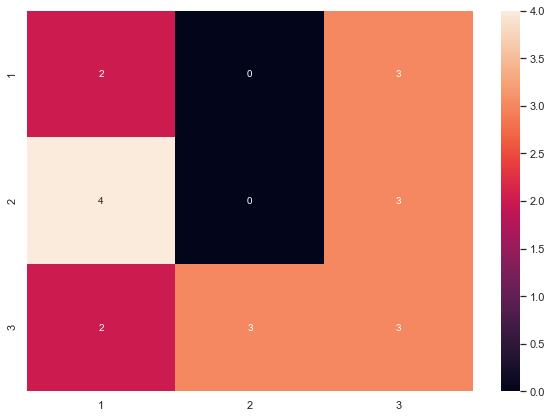

In [159]:
df_cm = pd.DataFrame(cm, index = [i for i in [1, 2, 3]],
                  columns = [i for i in [1, 2, 3]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)